In [368]:
import numpy as np
from scipy.special import jn
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [369]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
import scipy.io as sio


In [371]:
mat_data = sio.loadmat('/content/drive/MyDrive/signalfile/ecg_signal.mat')
x = mat_data['ecg_signal'].flatten()
fs = 500

In [372]:
def FBSE(x, fs):
    f = x
    N = len(f)
    nb = np.arange(1, N+1)

    MM = N
    if 'alfa' not in locals():
        x = 2
        alfa = np.zeros(MM)
        for i in range(1, MM+1):
            ex = 1
            while abs(ex) > 0.00001:
                ex = -jn(0, x) / jn(1, x)
                x = x - ex
            alfa[i-1] = x
            print(f'Root # {i} = {x:.5f} ex = {ex:.6f}')
            x = x + np.pi

    a = N
    D = np.zeros((MM, N))
    fre = (alfa * fs) / (2 * np.pi * N)
    for m1 in range(1, MM+1):
        D[m1-1, :] = jn(0, alfa[m1-1] / a * nb)

    a3 = np.zeros(MM)
    for m1 in range(1, MM+1):
        a3[m1-1] = (2 / (a**2 * (jn(1, alfa[m1-1]))**2)) * np.sum(nb * f * D[m1-1, :])


    return a3, fre, alfa

In [373]:
a3, alfa, fre = FBSE(x, fs)

Root # 1 = 2.40483 ex = -0.000000
Root # 2 = 5.52008 ex = -0.000000
Root # 3 = 8.65373 ex = -0.000004
Root # 4 = 11.79153 ex = -0.000001
Root # 5 = 14.93092 ex = -0.000000
Root # 6 = 18.07106 ex = -0.000000
Root # 7 = 21.21164 ex = -0.000000
Root # 8 = 24.35247 ex = -0.000000
Root # 9 = 27.49348 ex = -0.000000
Root # 10 = 30.63461 ex = -0.000000
Root # 11 = 33.77582 ex = -0.000000
Root # 12 = 36.91710 ex = -0.000000
Root # 13 = 40.05843 ex = -0.000000
Root # 14 = 43.19979 ex = -0.000000
Root # 15 = 46.34119 ex = -0.000000
Root # 16 = 49.48261 ex = -0.000000
Root # 17 = 52.62405 ex = -0.000000
Root # 18 = 55.76551 ex = -0.000000
Root # 19 = 58.90698 ex = -0.000000
Root # 20 = 62.04847 ex = -0.000000
Root # 21 = 65.18996 ex = -0.000000
Root # 22 = 68.33147 ex = -0.000000
Root # 23 = 71.47298 ex = -0.000000
Root # 24 = 74.61450 ex = -0.000000
Root # 25 = 77.75603 ex = -0.000000
Root # 26 = 80.89756 ex = -0.000000
Root # 27 = 84.03909 ex = -0.000000
Root # 28 = 87.18063 ex = -0.000000
Root

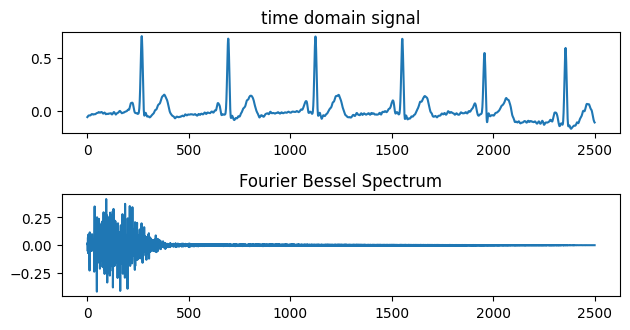

In [374]:
# Create time vector
t = np.arange(1, len(x) + 1)
plt.subplot(3, 1, 1)
plt.plot(t, x)
plt.title('time domain signal')
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(a3)
plt.title('Fourier Bessel Spectrum')
plt.tight_layout()

In [375]:
def local_maxima(p):
    """
    Finds the local maxima of a 1D array and returns their indices.

    Parameters:
        x (numpy.ndarray): The input array

    Returns:
        maxima_indices (numpy.ndarray): Indices of the local maxima
    """

    maxima_indices = []
    for i in range(1, len(p) - 1):
        if (p[i - 1] < p[i]) and (p[i] > p[i + 1]):
            maxima_indices.append(i)

    return np.array(maxima_indices)

In [376]:
def sorted_local_maxima(q):
    # Find the local maxima indices
    maxima_indices = local_maxima(q)

    # Extract the corresponding values
    maxima_values = q[maxima_indices]

    # Sort the values and indices together
    sorted_maxima = sorted(zip(maxima_values, maxima_indices), reverse=True)

    # Extract the sorted maxima values and indices
    sorted_maxima_values, sorted_maxima_indices = zip(*sorted_maxima)

    return sorted_maxima_values, sorted_maxima_indices

In [377]:
# Get sorted local maxima and indices
sorted_maxima_values, sorted_maxima_indices = sorted_local_maxima(np.abs(a3))

print("Sorted local maxima values:", sorted_maxima_values)
print("Sorted local maxima indices:", sorted_maxima_indices)

Sorted local maxima values: (0.41506332311194943, 0.4120783858655651, 0.40840177173925346, 0.3890229163235806, 0.3776703733906904, 0.36924491625105055, 0.3495160515728024, 0.34601214325663804, 0.3394894119457611, 0.333503188274545, 0.32393459148468834, 0.2938665828204825, 0.2926923550199254, 0.29063873227819537, 0.27727511408611094, 0.26798428151717574, 0.25703922882053404, 0.2551387223845219, 0.2462698583988413, 0.24055187366827108, 0.23677175318143853, 0.23545554793340126, 0.22655146113684274, 0.22053428825801227, 0.2197789455115212, 0.21505117705185897, 0.2145904491568871, 0.2119460345478653, 0.20990932777467095, 0.19967525867097816, 0.1996491126392856, 0.19566620986477293, 0.1951119999824339, 0.18545734747121692, 0.18326306354156302, 0.1799103897888355, 0.17770474697824512, 0.16267227061486603, 0.16084671427203223, 0.15725327254047222, 0.15448658324324924, 0.14549904073840556, 0.14135729664220942, 0.14071406165761358, 0.13663460764687557, 0.1358109296196987, 0.1335253414878463, 0.1

In [378]:
N=25 #number of local maxima for the design of EWT filter bank

In [379]:
if len(sorted_maxima_indices) > N:
        sorted_indices = sorted_maxima_indices[:N]
else:
        sorted_indices = sorted_maxima_indices
        N = len(sorted_maxima_indices)

In [380]:
sorted_indices=np.sort(sorted_indices)
sorted_indices


array([ 11,  34,  36,  47,  57,  80,  85,  89,  93,  98, 104, 112, 116,
       126, 129, 135, 149, 162, 173, 175, 186, 198, 209, 222, 234])

In [381]:
# Calculate middle points between consecutive maxima
bound = np.zeros(N)
for i in range(N):
   if i == 0:
      a = 0
   else:
       a = sorted_indices[i - 1]
       bound[i] = (a + sorted_indices[i]) // 2

In [382]:
bound

array([  0.,  22.,  35.,  41.,  52.,  68.,  82.,  87.,  91.,  95., 101.,
       108., 114., 121., 127., 132., 142., 155., 167., 174., 180., 192.,
       203., 215., 228.])

In [383]:
def EWT_Meyer_Scaling(w1, gamma, N):
    # Generate the 1D Meyer wavelet in the Fourier
    # domain associated to the segment [0, w1]
    # with transition ratio gamma

    Mi = int(np.floor(N/2))
    w = np.fft.fftshift(np.arange(0, 2*np.pi, 2*np.pi/N))
    w[:Mi] -= 2*np.pi

    aw = np.abs(w)
    yms = np.zeros(N)

    an = 1 / (2 * gamma * w1)
    pbn = (1 + gamma) * w1
    mbn = (1 - gamma) * w1

    for k in range(N):
        if aw[k] <= mbn:
            yms[k] = 1
        elif mbn <= aw[k] <= pbn:
            yms[k] = np.cos(np.pi * EWT_beta(an * (aw[k] - mbn)) / 2)

    yms = np.fft.ifftshift(yms)

    return yms

In [384]:
def EWT_beta(x):
    if x < 0:
        bm = 0
    elif x > 1:
        bm = 1
    else:
        bm = x**4 * (35 - 84 * x + 70 * x**2 - 20 * x**3)
    return bm

In [385]:
def EWT_Meyer_Wavelet(wn, wm, gamma, N):
    # Generate the 1D Meyer wavelet in the Fourier
    # domain associated to scale segment [wn, wm]
    # with transition ratio gamma

    Mi = int(np.floor(N/2))
    w = np.fft.fftshift(np.arange(0, 2*np.pi, 2*np.pi/N))
    w[:Mi] -= 2*np.pi

    aw = np.abs(w)
    ymw = np.zeros(N)

    an = 1 / (2 * gamma * wn)
    am = 1 / (2 * gamma * wm)
    pbn = (1 + gamma) * wn
    mbn = (1 - gamma) * wn
    pbm = (1 + gamma) * wm
    mbm = (1 - gamma) * wm

    for k in range(N):
        if pbn <= aw[k] <= mbm:
            ymw[k] = 1
        elif mbm <= aw[k] <= pbm:
            ymw[k] = np.cos(np.pi * EWT_beta(am * (aw[k] - mbm)) / 2)
        elif mbn <= aw[k] <= pbn:
            ymw[k] = np.sin(np.pi * EWT_beta(an * (aw[k] - mbn)) / 2)

    ymw = np.fft.ifftshift(ymw)

    return ymw

In [386]:
def EWT_Meyer_FilterBank(boundaries, N):
    # Generate the filter bank (scaling function + wavelets)
    # corresponding to the provided set of frequency segments

    Npic = len(boundaries)

    # Compute gamma accordingly to the theory
    gamma = 1
    for k in range(Npic - 1):
        r = (boundaries[k + 1] - boundaries[k]) / (boundaries[k + 1] + boundaries[k])
        if r < gamma:
            gamma = r

    r = (np.pi - boundaries[Npic - 1]) / (np.pi + boundaries[Npic - 1])
    if r < gamma:
        gamma = r
    gamma = (1 - 1 / N) * gamma  # This ensures that gamma is chosen as strictly less than the min

    mfb = [None] * (Npic + 1)

    # Start by generating the scaling function
    mfb[0] = EWT_Meyer_Scaling(boundaries[0], gamma, N)

    # Generate the wavelets
    for k in range(Npic - 1):
        mfb[k + 1] = EWT_Meyer_Wavelet(boundaries[k], boundaries[k + 1], gamma, N)

    mfb[Npic] = EWT_Meyer_Wavelet(boundaries[Npic - 1], np.pi, gamma, N)

    return mfb

<ipython-input-383-8a087b1dd2c1>:13: RuntimeWarning: divide by zero encountered in double_scalars
  an = 1 / (2 * gamma * w1)


Text(0.5, 1.0, 'FBSE-EWT filter bank')

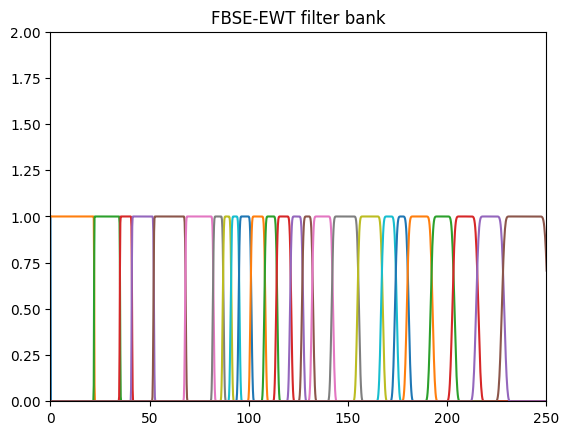

In [387]:
f=x
nfft=len(x)
Fs=fs
boundaries = (bound * (2 * np.pi)) / Fs  # Boundary evaluation from frequency
ff = np.fft.fft(f,nfft)

# Build the corresponding filter bank
mfb = EWT_Meyer_FilterBank(boundaries, len(ff))

# Filter the signal to extract each subband
ewt = [np.real(np.fft.ifft(np.conj(mfbk) * ff)) for mfbk in mfb]

# Plot the filter bank
plt.figure()
Bound = 1
xxx = np.linspace(0, 1, len(mfb[0])) * Fs
for i in range(len(mfb)):
    plt.plot(xxx, mfb[i])
plt.xlim([0, round(Fs/2)])
plt.ylim([0, 2])
plt.title('FBSE-EWT filter bank')

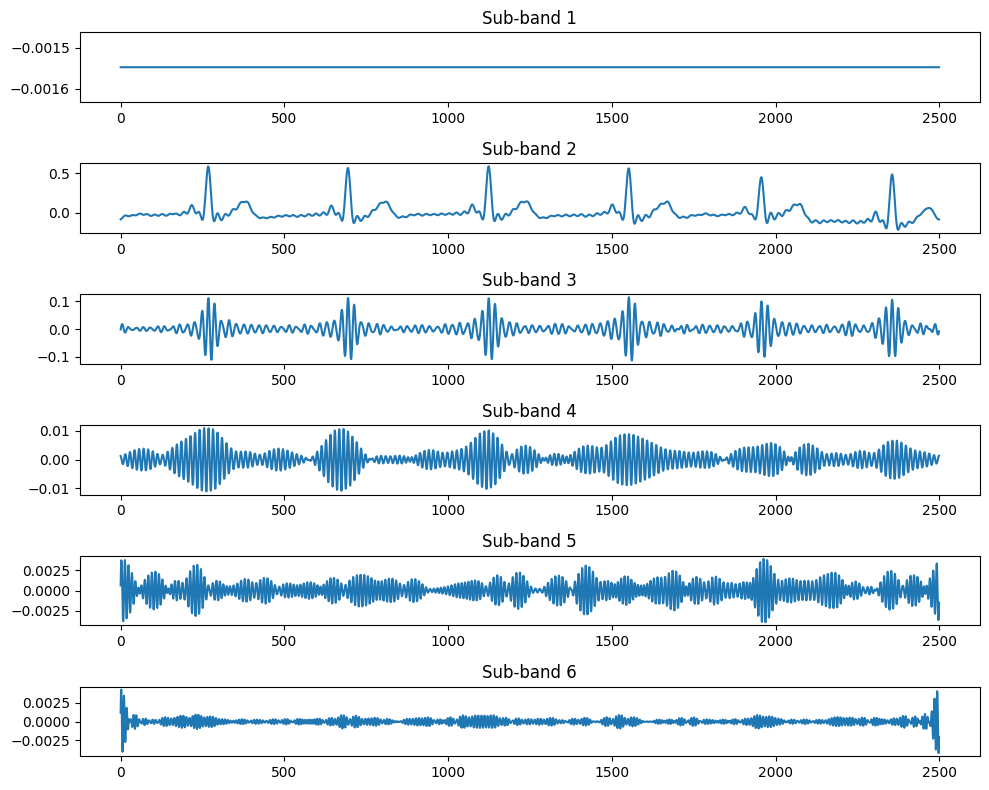

In [388]:
L=5
# Plot the sub-bands
plt.figure(figsize=(10, 8))
for i in range(L + 1):
    plt.subplot(L + 1, 1, i + 1)
    plt.plot(ewt[i])
    plt.title(f'Sub-band {i + 1}')

plt.tight_layout()
plt.show()


In [389]:
range(N)

range(0, 25)